```Test mardown```

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from random import random

In [3]:
df = pd.read_csv('winequality-red.csv',';')

In [52]:
import matplotlib.pyplot as plt

def scatterplot_matrix(data, good_threshold, bad_threshold, save_plot=False):

    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(100, 100))
    fig.subplots_adjust(hspace=0, wspace=0)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

#     data[data["quality"] >= bad_threshold and data["quality"] <= good_threshold]
    colors = ['green' if k > good_threshold else 'red' if k < bad_threshold else 'white' for k in data["quality"]]
    numdata -= 1 # quality
    for i in range(numdata):
        axes[i,i].text(0.5, 0.5, data.columns[i], horizontalalignment='center',
                       verticalalignment='center', fontsize=62)
        print(str(i * 10) + '%')
        j = 0
        for j in range(numdata):
            if (j == i):
                continue   
            axes[i, j].scatter(data[data.columns[j]], data[data.columns[i]], c=colors, s=200)
    plt.tight_layout()
    if (save_plot == True):
        plt.savefig("scatter_matrix.png")
    
    plt.show()
#     fig

In [50]:
%%time
# print(df.iloc[1])
scatterplot_matrix(df, 6, 5)

NameError: name 'scatterplot_matrix' is not defined

In [89]:
class Perceptron(object):
    
    def __init__(self, data):
        self.data    = data
        self.bias    = random()
        self.weights = [random() for i in range(data.shape[1] - 1)]
        
    def predict(self, input_row):
        summ = self.bias
        for i, value in enumerate(input_row):
            summ += value * self.weights[i]
        return 1.0 if summ > 0.0 else 0.0

    def train_epoch(self):
        epoch_error = 0.0
        for row in self.data:
#             print(row)
            true_answer = row[-1]
            prediction = self.predict(row[:-1])
            error = true_answer - prediction
            epoch_error += error**2
            self.bias += self.learning_rate * error
            for i, value in enumerate(row[:-1]):
                self.weights[i] += self.learning_rate * error * value
        return epoch_error

    def train_data(self, a_epochs, learning_rate, verbose=False):
        self.learning_rate = learning_rate
        current_epoch = 0
        performance = []
#         print(self.weights)
        
        while True:
            epoch_error = self.train_epoch()
            
            tuple = (current_epoch, epoch_error, self.weights, self.bias)
            performance.append(tuple)
            if (verbose):
                print(tuple)
            
            if (a_epochs == 0):
                if epoch_error == 0:
                    break
            else:
                if current_epoch >= a_epochs:
                    break
            current_epoch += 1
               
        return performance
        

In [96]:
df = df.assign(goodness = pd.Series(df['quality'] > 5, dtype=int))
df = df[(df['quality'] > 7) | (df['quality'] < 4)]
selected_data = df.loc[:, ['volatile acidity', 'alcohol', 'goodness']]
# selected_data = selected_data.reset_index(drop=True)
# selected_wine_data = wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)][features]
print(selected_data)
# selected_data.shape

      volatile acidity  alcohol  goodness
267              0.350    12.80         1
278              0.320    12.60         1
390              0.850    12.90         1
440              0.310     9.80         1
455              0.620    13.40         1
459              0.580     9.00         0
481              0.300    11.70         1
495              0.350    11.00         1
498              0.350    11.00         1
517              0.610     8.40         0
588              0.420    14.00         1
690              1.185    10.70         0
828              0.570    12.70         1
832              0.440     9.90         0
899              1.020    11.00         0
1061             0.400    12.50         1
1090             0.260    11.80         1
1120             0.540    13.10         1
1202             0.420    11.70         1
1269             0.490    14.00         1
1299             1.580    10.90         0
1374             0.815     9.80         0
1403             0.330    10.00   

In [94]:
def plot_errors(ax, performance):
    epochs = [i[0] for i in performance]
    errors = [i[1] for i in performance]
    ax.plot(epochs, errors)
#     ax.set_xlim(xmax=len(performance) + 1000)
    ax.set_ylim(ymin=-1)
    ax.set_title('Errors as a function of epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('classification errors')
    
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    """
    Plot the performance of perceptron or adaline.
    This function will produce a two plot figure:
    1) Number of classification errors as a function of epochs
    2) Decision boundary for two factors
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    plot_errors(axes[0], performance)
    plt.show()

(4534, 0.0, [-248.83632514437176, 34.13889424553335], -228.70229186572996)
0.0
0.0
0.0
0.0
0.0


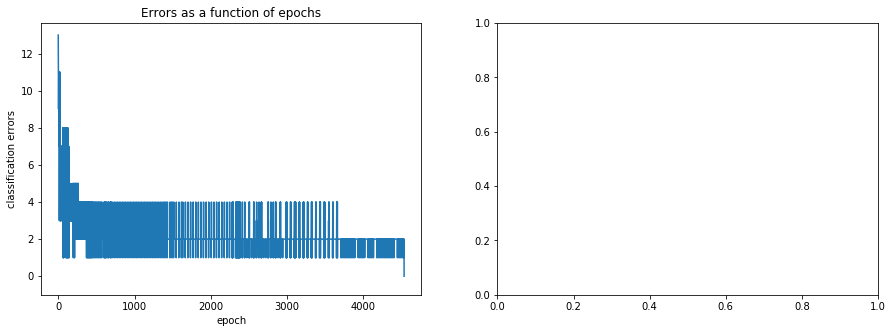

In [97]:
new_percetpron = Perceptron(selected_data.values)

performance = new_percetpron.train_data(0, 0.5, False)

print(performance[-1])

print(new_percetpron.predict([12.80, 3.35])) #1
print(new_percetpron.predict([10.20, 3.40])) #0
print(new_percetpron.predict([11.80, 2.98])) #1
print(new_percetpron.predict([14.00, 3.72])) #1
print(new_percetpron.predict([9.80, 3.32])) #0
plot_performance(performance, selected_data, 4, 7)